In [16]:
# Linprog my solver 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [17]:
# coefficients
c = [-1, -2]  
A = [[1, 3], [5, 1]]
b = [6, 4]

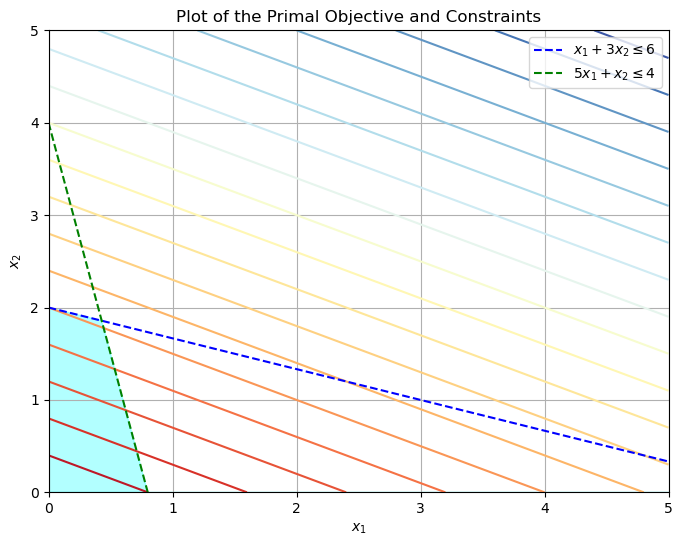

In [18]:
# Plotting (I used chatgpt to help me with this ploting)
x1_vals = np.linspace(0, 5, 400)
x2_vals = np.linspace(0, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = X1 + 2 * X2 
plt.figure(figsize=(8, 6))
contours = plt.contour(X1, X2, Z, levels=20, cmap="RdYlBu")
x2_constraint1 = (6 - X1) / 3
x2_constraint2 = (4 - 5 * X1)
plt.plot(X1[0], x2_constraint1[0], label=r'$x_1 + 3x_2 \leq 6$', linestyle='--', color='blue')
plt.plot(X1[0], x2_constraint2[0], label=r'$5x_1 + x_2 \leq 4$', linestyle='--', color='green')
plt.fill_between(x1_vals, 0, np.minimum((6 - x1_vals) / 3, 4 - 5 * x1_vals), color='cyan', alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Plot of the Primal Objective and Constraints')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Solve
result = linprog(c, A_ub=A, b_ub=b, bounds=[(0, None), (0, None)], method='highs')
x1_opt, x2_opt = result.x
max_value = -result.fun
print(f"Optimal: x1 = {x1_opt}, x2 = {x2_opt}")
print(f"Maximum: {max_value}")

Optimal: x1 = 0.42857142857142855, x2 = 1.8571428571428572
Maximum: 4.142857142857143


In [20]:
# Dual Objective
c_dual = [6, 4]
# Constraints
A_dual = [[1, 5], [3, 1]]
b_dual = [1, 2]
y1_bounds = (0, None)
y2_bounds = (0, None)

In [21]:
# Solving the dual LP
result_dual = linprog(c_dual, A_ub=-np.array(A_dual), b_ub=-np.array(b_dual), bounds=[y1_bounds, y2_bounds], method='highs')
y1_opt, y2_opt = result_dual.x
min_value_dual = result_dual.fun
print(f"Optimal values for dual: y1 = {y1_opt}, y2 = {y2_opt}")
print(f"Minimum value of the dual: {min_value_dual}")
### Same min values

Optimal values for dual: y1 = 0.6428571428571429, y2 = 0.07142857142857144
Minimum value of the dual: 4.142857142857143


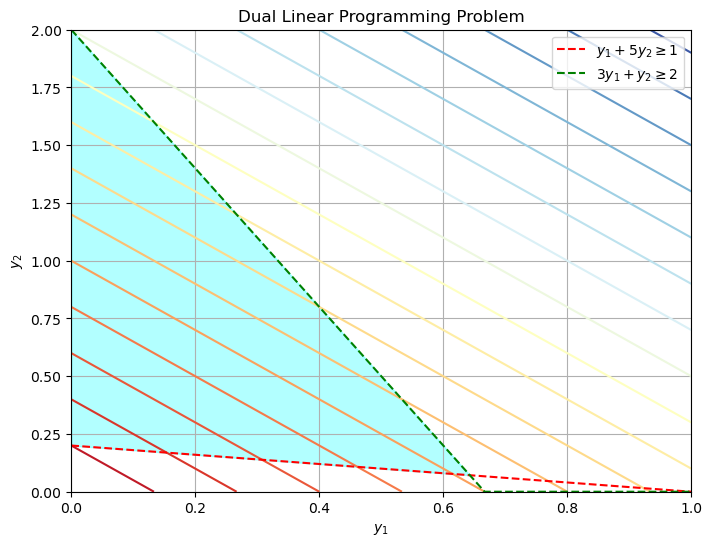

In [22]:
y1_vals = np.linspace(0, 1, 400)
y2_vals = np.linspace(0, 2, 400)
Y1, Y2 = np.meshgrid(y1_vals, y2_vals)
Z_dual = 6 * Y1 + 4 * Y2
y2_constraint1 = np.maximum(0, (1 - y1_vals) / 5) 
y2_constraint2 = np.maximum(0, (2 - 3 * y1_vals))  
# Plot
plt.figure(figsize=(8, 6))
plt.contour(Y1, Y2, Z_dual, levels=20, cmap="RdYlBu")
plt.plot(y1_vals, y2_constraint1, 'r--', label=r'$y_1 + 5y_2 \geq 1$')
plt.plot(y1_vals, y2_constraint2, 'g--', label=r'$3y_1 + y_2 \geq 2$')
plt.fill_between(y1_vals, y2_constraint1, y2_constraint2, where=(y2_constraint2 > y2_constraint1), color='cyan', alpha=0.3)
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')
plt.title('Dual Linear Programming Problem')
plt.legend()
plt.grid(True)
plt.show()